
# <span style="color:rgb(213,80,0)">This script generates Figure 13 and Figure 7 of the Supplentary Information section</span>

This Figure is a set of heatmaps representing the performances of the outlier detection in algorithm 3. For the Figure 7 of the SI, switch shift = 10 to shift = 5.

## preparation of environment

In [1]:
% The shift of interest in this plot:
shift = 10;

% folder of input data is the same of Figure 12
out_path = './aux';

% folder where to save the plots: no save if empty
savein = [];
if ~isempty(savein) && ~exist(savein,'dir')
    mkdir(savein);
end

% load data from the Figure 12 folder
% load([out_path filesep 'Algo3_SummaryResults_s' num2str(shift) '.mat']);
out_S = readtable([out_path filesep 'Algo3_SummaryResults_s' num2str(shift) '.xlsx']);

% save the data as needed for Figure 13 in the new folder
%OutDet = out_S(:,[2,8,9,16,17,18]);
%writetable(OutDet,[savein filesep 'OutDet.csv']);
% Load the data
%data = readtable([savein filesep 'OutDet.csv']);

data = out_S(:,[2,8,9,16,17,18]);

% some general graphic settings
sgtitleFontsize = 20;
axFontsize      = 18;
textFontsize    = 18;
xylabelFontsize = 18;

% Define unique values for each parameter
n_values       = unique(data.n);
epsilon_values = unique(data.epsilon_true);
J_values       = unique(data.J);

% Create a figure with subplots for each metric (TPR, FPR, FNR)
metrics       = {'mcd_TPR', 'mcd_FPR', 'mcd_FNR'};
metric_titles = {'TPR', 'FPR', 'FNR'};
colors        = {'#0072BD', '#D95319', '#EDB120', '#7E2F8E'};  % Different colors for different J values

## Heatmaps for various J values


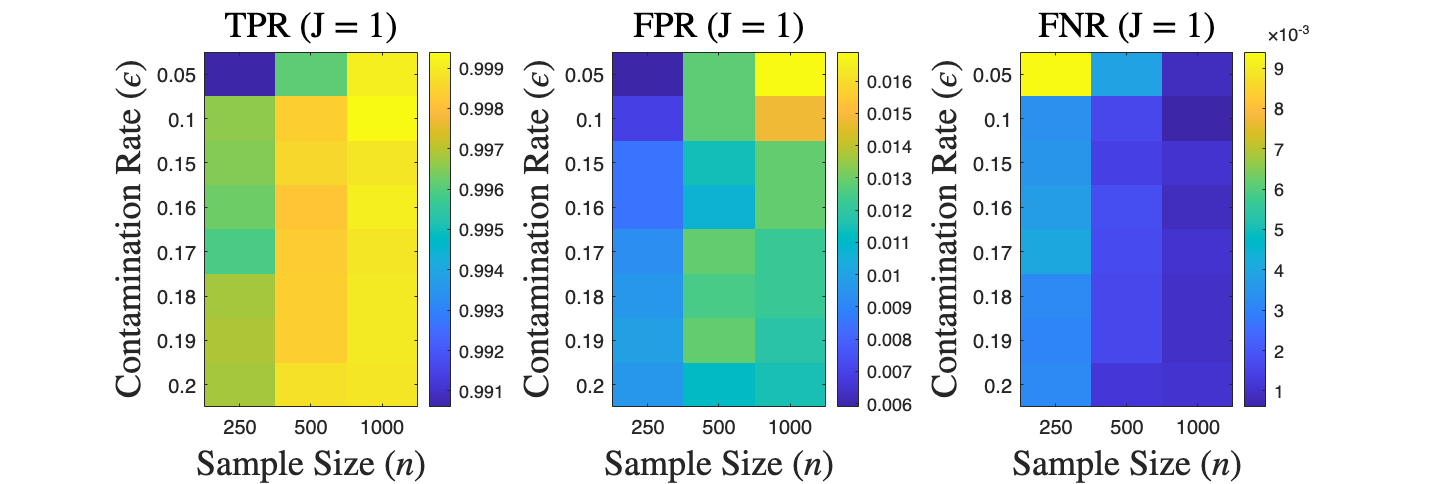


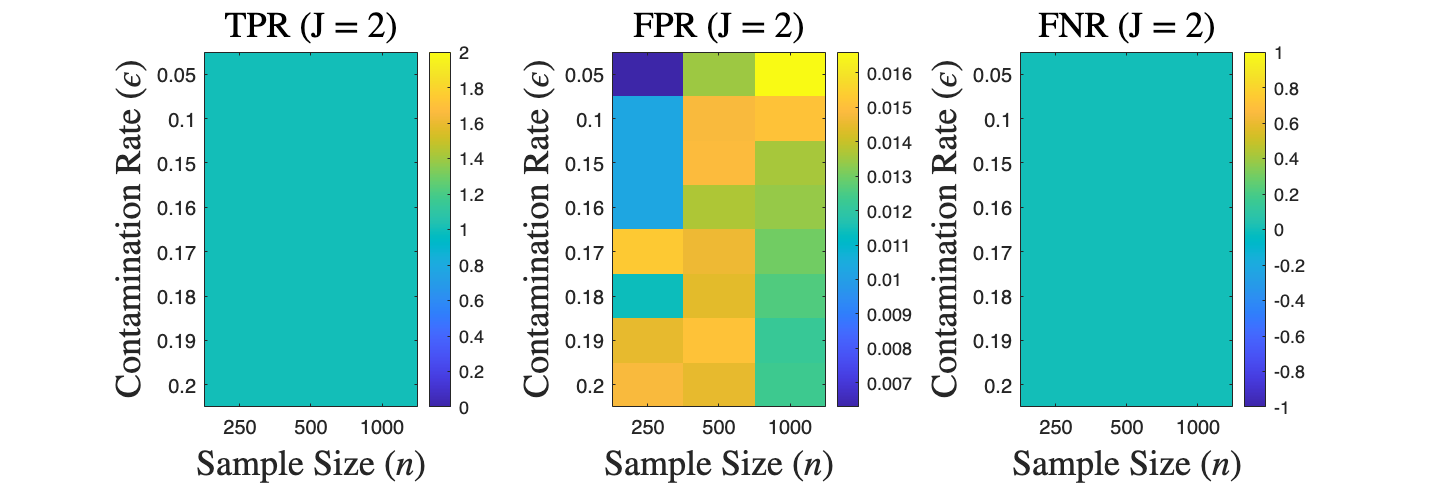

In [2]:
for j_idx = 1:length(J_values)
    j_val = J_values(j_idx);

    % Create a 3D matrix to store values for the heatmap
    % Dimensions: [epsilon, n, metric]
    heatmap_data = zeros(length(epsilon_values), length(n_values), length(metrics));

    % Fill the 3D matrix with data
    for e_idx = 1:length(epsilon_values)
        for n_idx = 1:length(n_values)
            % Get the row that matches these parameters
            row_idx = find(data.epsilon_true == epsilon_values(e_idx) & ...
                          data.n == n_values(n_idx) & ...
                          data.J == j_val);

            % Store each metric
            for m_idx = 1:length(metrics)
                heatmap_data(e_idx, n_idx, m_idx) = data.(metrics{m_idx})(row_idx);
            end
        end
    end

    figure('Position', [100, 100, 1500, 500]);
    % Plot heatmaps for each metric for the current J value
    for m_idx = 1:length(metrics)
        % Create a heatmap to visualize the interaction effect of n and epsilon on metrics
        subplot(1, length(metrics), m_idx);
        imagesc(heatmap_data(:,:,m_idx));
        colorbar;

        % Set labels
        xlabel('Sample Size ( $n$ )','Interpreter','Latex','FontSize',xylabelFontsize);
        ylabel('Contamination Rate ( $\epsilon$ )','Interpreter','Latex','FontSize',xylabelFontsize);
        title([metric_titles{m_idx} ' (J = ' num2str(j_val) ')'],'Interpreter','Latex','FontSize',xylabelFontsize);

        % Set x and y tick labels
        xticks(1:length(n_values));
        xticklabels(arrayfun(@num2str, n_values, 'UniformOutput', false));
        yticks(1:length(epsilon_values));
        yticklabels(arrayfun(@num2str, epsilon_values, 'UniformOutput', false));
    end

    if ~isempty(savein)
        %sgtitle(['Heatmap of Performance Metrics for $J = ' num2str(j_val) '$ '], 'FontSize', sgtitleFontsize,'Interpreter','Latex');
        saveas(gcf, [savein filesep 'HM_outlier_detection_J' num2str(j_val) '_shift' num2str(shift) '.png'],'png');
        saveas(gcf, [savein filesep 'HM_outlier_detection_J' num2str(j_val) '_shift' num2str(shift) '.eps'],'epsc');
        saveas(gcf, [savein filesep 'HM_outlier_detection_J' num2str(j_val) '_shift' num2str(shift) '.fig'],'fig');
    end
    % Pause to allow viewing before the next plot (if running interactively)
    %pause(1);
end

<center>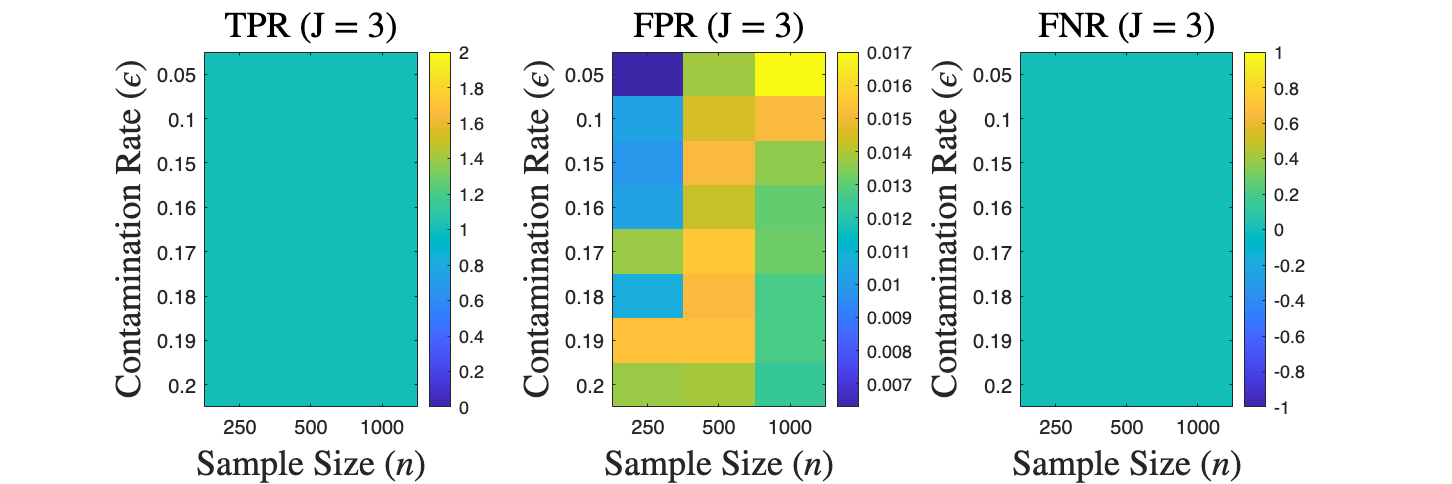</center>


<center>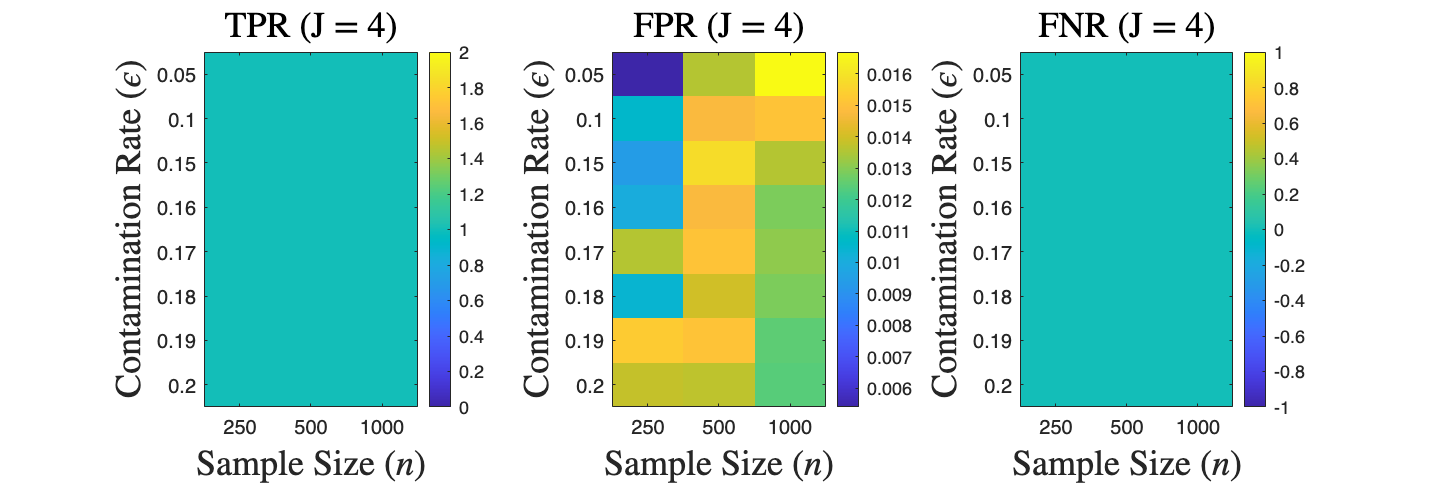</center>


